In [1]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import io
import requests
from datetime import date

#change date format
def to_ymd (date):
    return '-'.join(date.split("/")[::-1])

In [2]:
#Download and save
url = 'https://covid19.isciii.es/resources/serie_historica_acumulados.csv'
dataEsp = pd.read_csv(url, encoding = 'latin1')
dataEsp = dataEsp.fillna(0)
dataEsp = dataEsp[:-2]
dataEsp['Fecha'] = dataEsp['Fecha'].apply(to_ymd)
dataEsp.to_csv('covid_ciii' + str(date.today()), encoding = 'latin1')

#Group by CCAA and date
dataEsp=dataEsp.pivot_table(index='CCAA Codigo ISO', columns='Fecha', values=['Casos ','Fallecidos','Hospitalizados','UCI'])
dataEsp.columns = dataEsp.columns.swaplevel(0,1)
dataEsp.sort_index(axis=1, level=0, inplace=True)

dates = sorted(list(set(dataEsp.columns.get_level_values(0))))

In [ ]:
#tests
def plotV (var):
    if var in ['Casos ', 'Fallecidos', 'UCI', 'Hospitalizados']:
        for ccaa in dataEsp.index:
            plt.plot(dates,[dataEsp[d,var][ccaa] for d in dates], label = ccaa)
        plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left', borderaxespad=0.)
        plt.xticks([dates[i] for i in range(len(dates)) if i%2==0], rotation = 'vertical')
        plt.title(var)
        plt.show()
for ccaa in dataEsp.index:
    plt.plot([dataEsp[d,'Fallecidos'][ccaa] for d in dates], label=ccaa)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

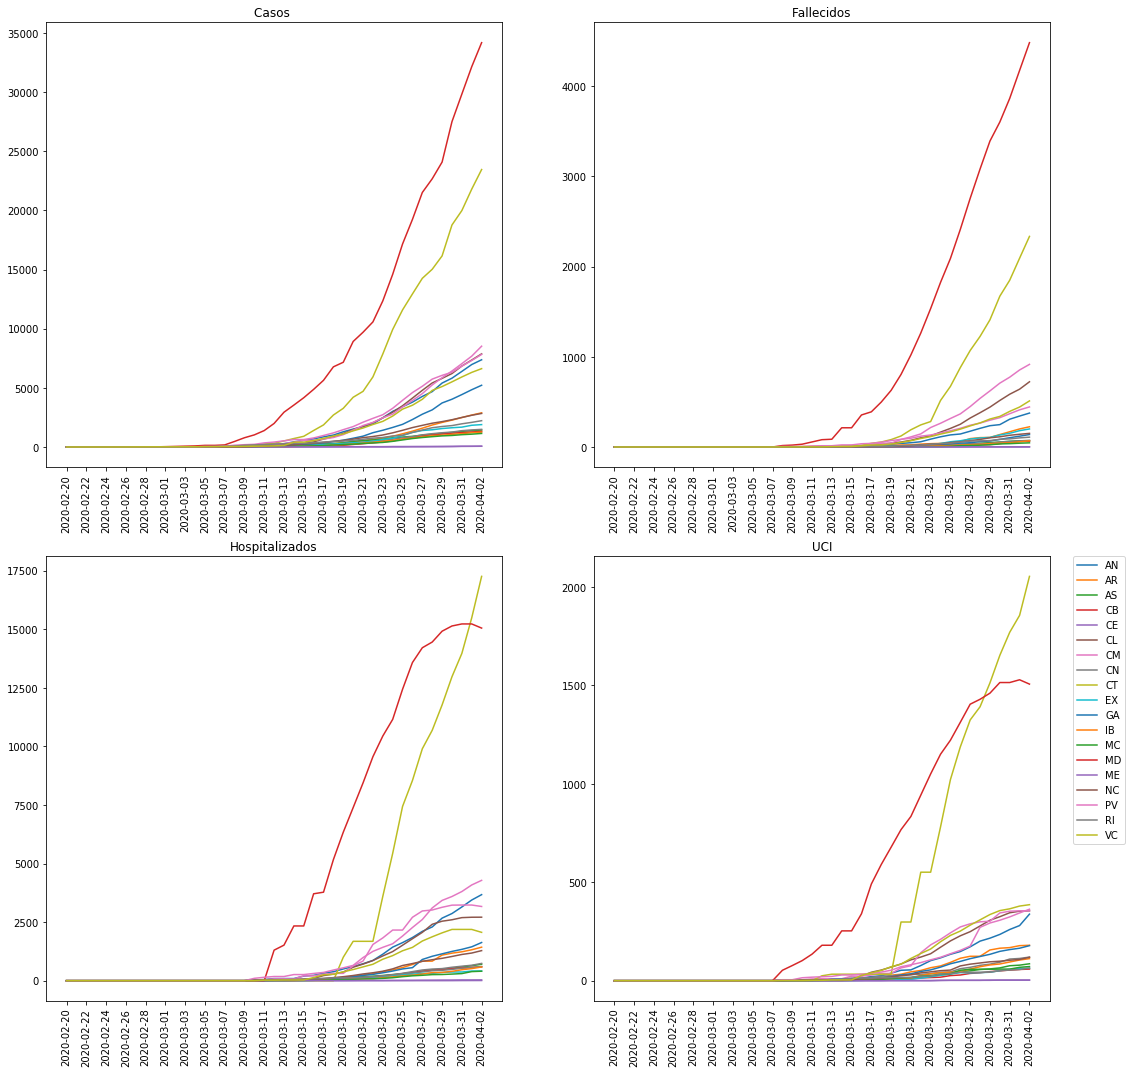

In [5]:
plt.figure(figsize=(18,18))
for i in range(4):
    var = dataEsp.columns[i][1]
    plt.subplot(2, 2, i+1)
    for ccaa in dataEsp.index:
        plt.plot(dates,[dataEsp[d,var][ccaa] for d in dates], label = ccaa)
    plt.xticks([dates[i] for i in range(len(dates)) if i%2==0], rotation = 'vertical')
    plt.title(var)
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('plots_byccaa/allccaa'+str(date.today()))
plt.show()